<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2023 </h2></center> 
<center><h3> Lab 4</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

movies = pd.read_csv('blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *Main_Genre*: primarni žanr filma
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: duljina filma u minutama
- *rank_in_year*: rank među 10 najboljih filmova objavljenih te godine
- *rating*: ocjena publike
- *studio*: studio koji je producirao film
- *title*: naslov filma
- *worldwide_gross*: ukupni svjetski prihod u dolarima
- *year*: godina izdanja


## Vizualizacija jedne varijable

- Prvo ćemo vidjeti kako vizualizirati jednu varijablu koristeći biblioteku matplotlib. Usredotočimo se na stupac "Worldwide gross revenue" datafremea i pregledajmo distribuciju pomoću histograma i boxplota.
- Primijetite korištenje plt.xlabel(), plt.ylabel(), plt.title() - svaka vizualizacija treba imati označenu os i naslov!
- plt.hist() uzima nekoliko važnih argumenata: bins - broj binova i range - raspon vrijednosti razmatranih u histogramu

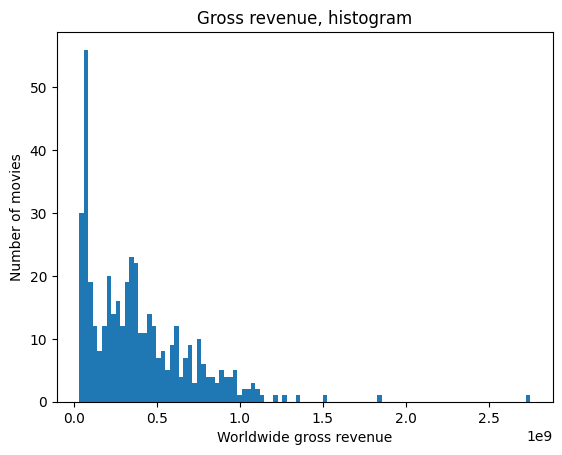

In [4]:
plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

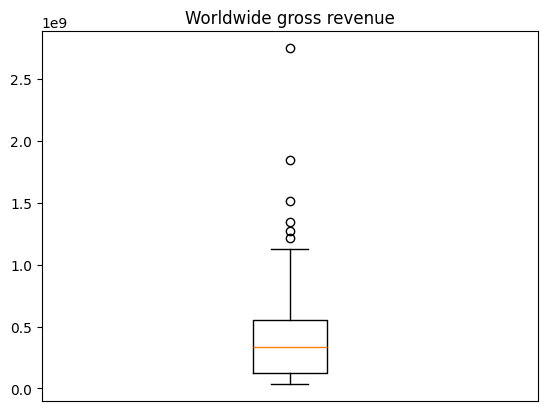

In [5]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Vizualizacija dviju kontinuiranih varijabli

- Hoće li filmski hitovi s višom gledanošću ostvariti više prihoda!
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

Text(0, 0.5, 'Rating')

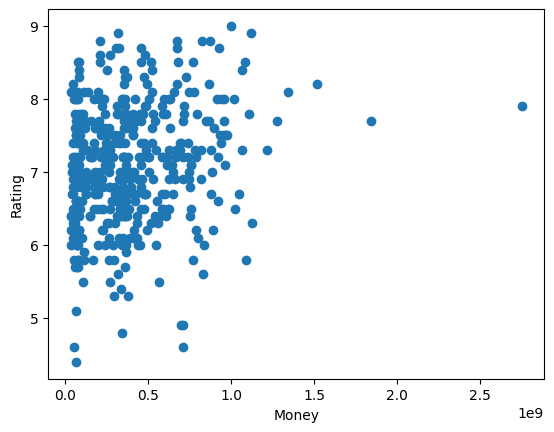

In [6]:
# scatter
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])
plt.xlabel('Money')
plt.ylabel('Rating')

- Pokušat ćemo markere učiniti manjim određivanjem malog parametra veličine "s".

Text(0, 0.5, 'Rating')

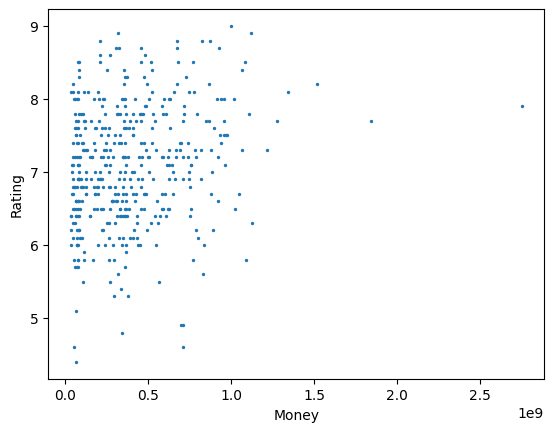

In [7]:
# scatter sa s=2
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s=2)
plt.xlabel('Money')
plt.ylabel('Rating')

Scatterplot nisu korisni kada je broj točaka vrlo velik jer ih postaje teško protumačiti. Seaborn nudi mnoge alternativne učinkovite načine vizualizacije.

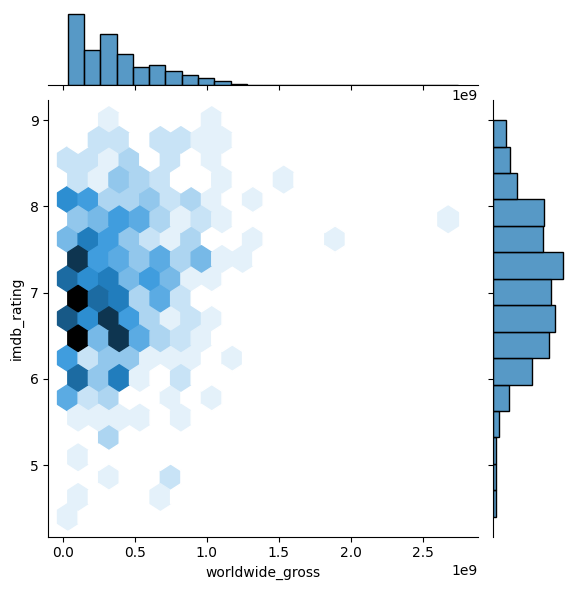

In [8]:
# jointplot sa kind="hex"
sns.jointplot(x="worldwide_gross", y="imdb_rating", data=movies, kind='hex')

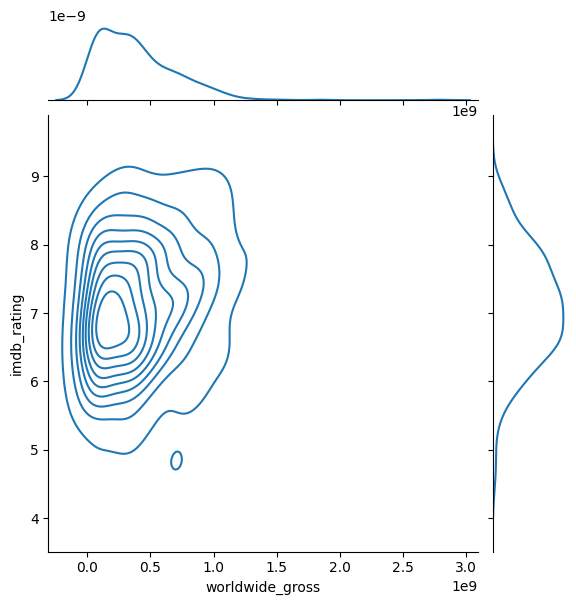

In [9]:
# jointplot sa kind="kde"
sns.jointplot(x="worldwide_gross", y="imdb_rating", data=movies, kind='kde')

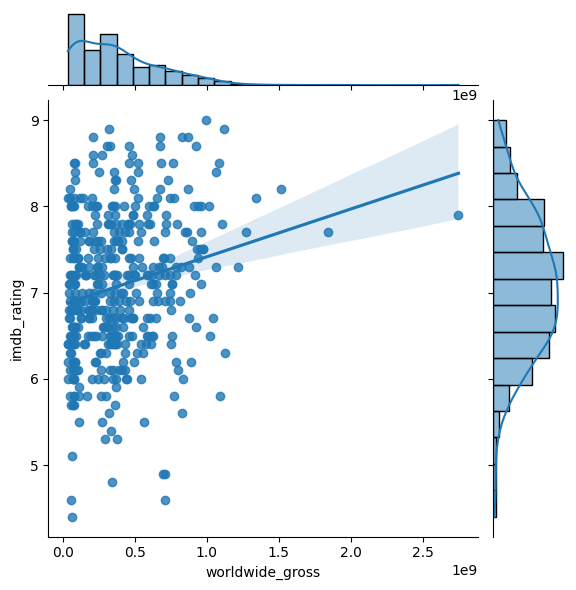

In [10]:
# jointplot sa kind="reg"
sns.jointplot(x="worldwide_gross", y="imdb_rating", data=movies, kind='reg')

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo pet najzastupljenijih žanrova i ispitajmo prihode
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

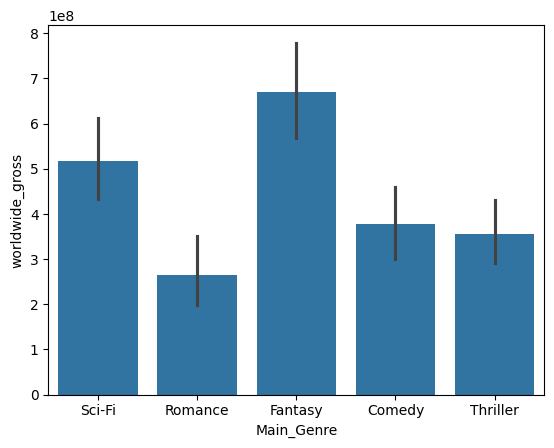

In [11]:
# barplot
newData = movies.loc[movies["Main_Genre"].isin(["Thriller", "Comedy", "Fantasy", "Sci-Fi", "Romance"])]
sns.barplot(y="worldwide_gross", x="Main_Genre", data=newData)

<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

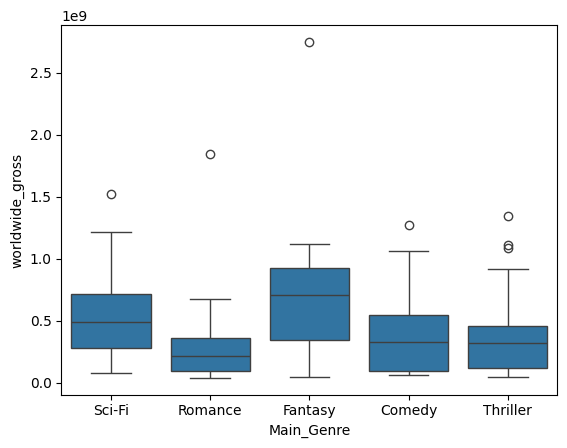

In [12]:
# boxplot
sns.boxplot(y="worldwide_gross", x="Main_Genre", data=newData)

<Axes: xlabel='Main_Genre', ylabel='worldwide_gross'>

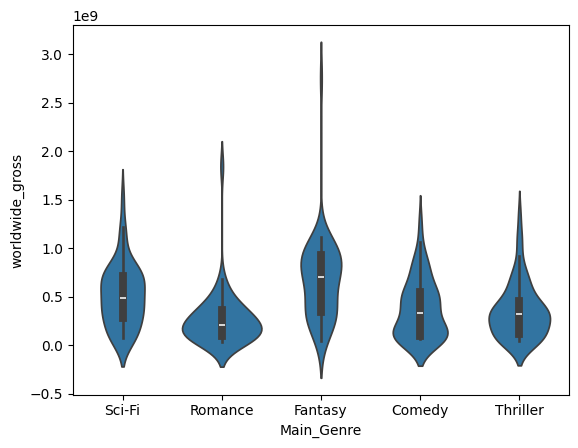

In [13]:
# violinplot
sns.violinplot(y="worldwide_gross", x="Main_Genre", data=newData)

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedeće dvije vježbe dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Kreiranje panela

- Želimo razumjeti koliko dugo traju blockbusteri u različitim žanrovima. Kada radite s velikim brojem kategorija (imamo 16 žanrova u skupu podataka o filmovima), vizualizacije se lako zatrpaju i postaje korisno izraditi ploče s malim subplotovima.

- Napravite panel 4x4 za 16 žanrova. U svakom subplotu prikažite histogram s distribucijom duljina filma za različite kategorije.

- Savjeti: koristite Matplotlib funkciju subplots

- Kojim žanrovima pripadaju i najduži filmovi? Što možete reći o duljini komedija i animiranih filmova?

In [14]:
# Izračunaj statistiku po žanrovima


In [15]:
# Kreirajte plot sa 4x4 panela



## 2.2 Heatmape

- Koji studiji rade blockbustere u kojem žanru?

- Ima mnogo studija i mnogo žanrova. Kada radite s dvije varijable koje obje imaju mnogo različitih kategorija, često nema prostora za predstavljanje svake kombinacije dviju kategorija s detaljnim dijagramom (kao što je barplot ili boxplot). Postaje korisno predstaviti svaki stratum jednim brojem, označenim bojom na toplinskoj karti. Takve su vizualizacije korisne za brzo razumijevanje podataka.

- Vizualizirajte broj blockbustera koje je napravio svaki studio, svakog žanra. U nastavku ćete pronaći grubu skicu. Savjet: koristite funkciju Seaborn heatmap.

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokušajte razumjeti kakav je odnos između žanrova razumijevanjem obrazaca supojavljivanja između glavnog i sekundarnog žanra. Koliki je prosječni prihod za filmove s različitim kombinacijama glavnog i drugog žanra?

- Trebali biste moći odgovoriti na sljedeća pitanja iz dvije vizualizacije: U koje žanrove spada većina filmova koje snima studio Warner Bros? Koji je najuspješniji žanr filmskih filmova Walta Disneya? Koji je studio napravio najveći broj ljubavnih blockbustera? Koja kombinacija žanrova donosi najveći prihod?


<Axes: xlabel='studio', ylabel='Main_Genre'>

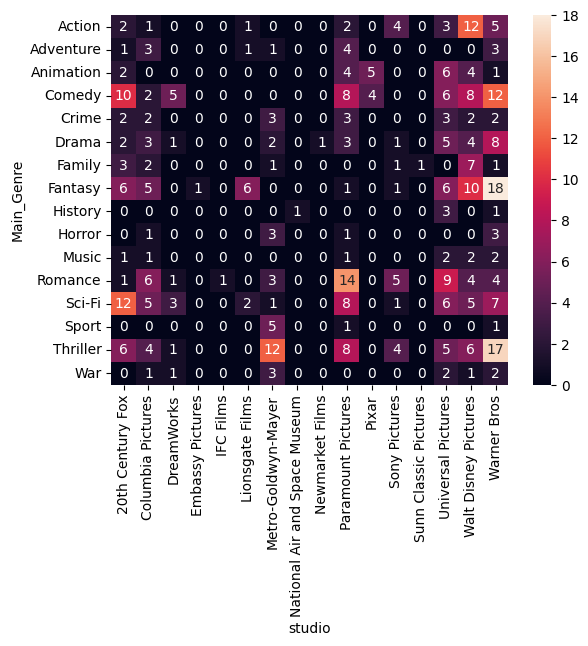

In [16]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu
data = pd.crosstab(movies['Main_Genre'], movies['studio'])
sns.heatmap(data = data, annot=True)

C:\Users\f0dor\AppData\Local\Temp\ipykernel_14456\3102403030.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data2 = pd.crosstab(movies['Main_Genre'], movies['Genre_2'], values=movies['worldwide_gross'], aggfunc=sum)


<Axes: xlabel='Genre_2', ylabel='Main_Genre'>

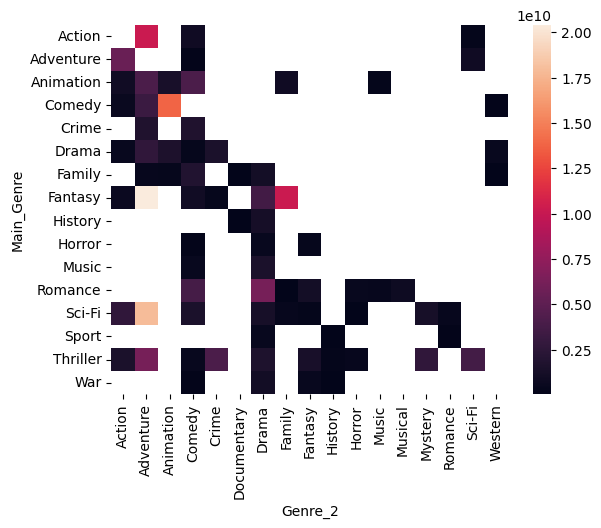

In [17]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu
data2 = pd.crosstab(movies['Main_Genre'], movies['Genre_2'], values=movies['worldwide_gross'], aggfunc=sum)
sns.heatmap(data = data2)